## Perspective Transforms
Perspective is the phenomenon where an object appears smaller the further away it is from a viewpoint like a camera, and how parallel lines seem to converge at a point. In mathematical terms, the greater the magnitude of an object's z coordinate (or distance), the smaller it will appear in an image. 

A perspective transform maps the points in a given image to different, desired, image points with a new perspective. The bird’s-eye view perspective transform let’s us view a lane from above; this will be useful for calculating the lane curvature later on. Aside from creating a bird’s eye view representation of an image, a perspective transform can also be used for all kinds of different view points.     

Self-driving cars need to be told the correct steering angle to turn, left or right. You can calculate this angle if you know a few things about the speed and dynamics of the car and how much the lane is curving.

One way to calculate the curvature of a lane line, is to fit a 2nd degree polynomial to that line, and from this you can easily extract useful information.

For a lane line that is close to vertical, you can fit a line using this formula: f(y) = Ay^2 + By + C, where A, B, and C are coefficients.

A gives you the curvature of the lane line, B gives you the heading or direction that the line is pointing, and C gives you the position of the line based on how far away it is from the very left of an image (y = 0).

In [1]:
import glob
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
# Read in the saved camera matrix and distortion coefficients
# from cv2.calibrateCamera() (in camera-calibration notebook)
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

(720, 1280, 3)


Text(0.5,1,'Original Image')

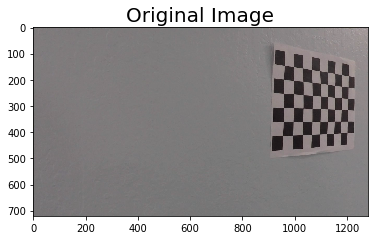

In [21]:
# Read in an image
img = cv2.imread('./camera_cal/calibration14.jpg')
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y
print(img.shape)
plt.imshow(img)
plt.title('Original Image', fontsize=20)

In [35]:
def corners_unwarp(img, nx, ny, mtx, dist,offset=100):
    # Undistor using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert to grayscale
    gray = cv2.cvtColor(undist,cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(undist, (nx, ny), None)
    if ret == True:
        img_size = (gray.shape[1],gray.shape[0])
        print(img_size)
        # get outer four detected corners (top-left, top-right, bottom-right, and bottom-left)
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # define destination points
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])

        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)
    return undist,warped, M

(1280, 720)


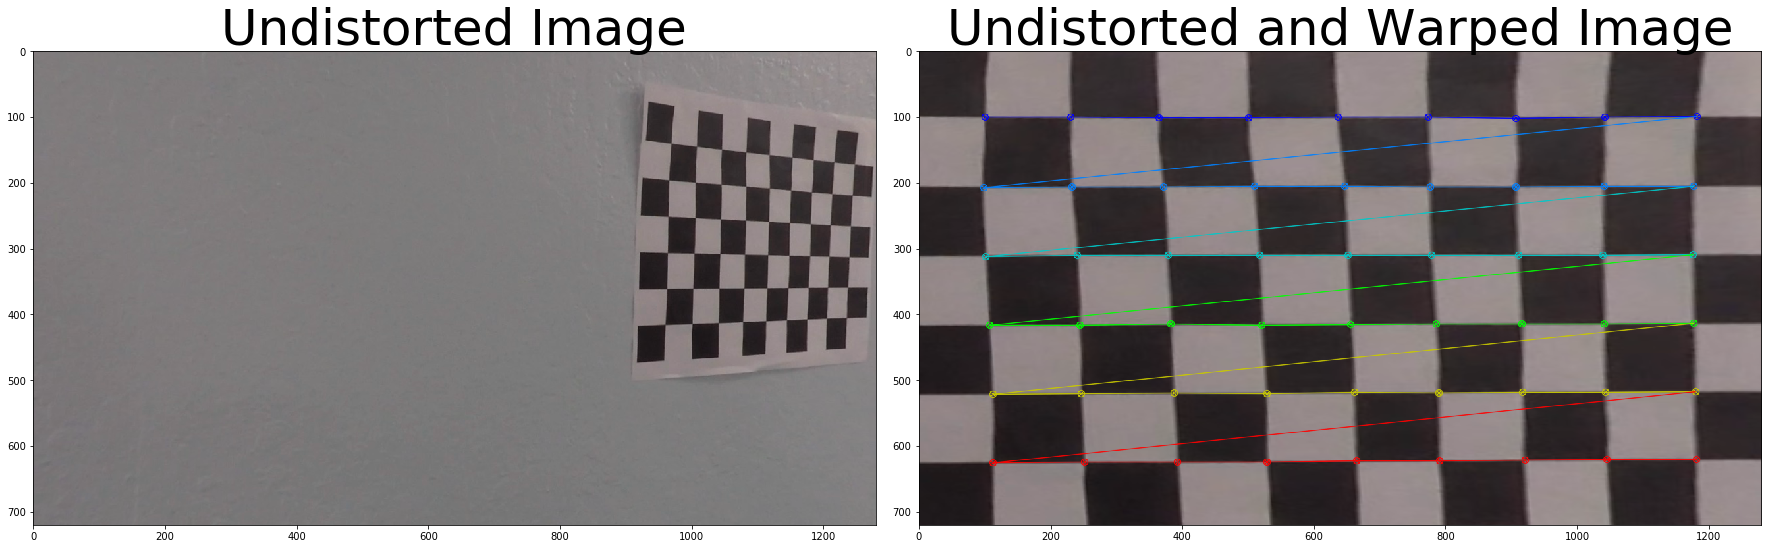

In [41]:
undist,top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
# print(top_down,perspective_M)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undist)
ax1.set_title('Undistorted Image', fontsize=50)

ret, corners = cv2.findChessboardCorners(top_down,(nx,ny),None)
cv2.drawChessboardCorners(top_down, (nx,ny),corners,ret)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## References
https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/